## 01. 純文字文件 
* **常見基本步驟，開檔、讀/寫檔、關檔**
* 1. 開檔：`file_obj = open('file', mode='mode')`
* 2. 開檔的模式(mode)有四種：
    - r 開啟檔案只供讀取，為預設值
    - w 開啟檔案供寫入，如果原先檔案有內容，其內容將被覆蓋
    - a 開啟檔案供寫入，如果原先檔案有內容，新寫入的資料將附加在後面
    - x 開啟一個新的檔案供寫入，如果所開啟的檔案已經存在則會產生錯誤

* 3. 讀檔方式有兩種：
    - `file_obj.readlines()` 一次讀一行 
    - `file_obj.read()` 一次讀全部
    
* 4. 寫檔方式有兩種：
    - `file_obj.write(str)` 
    - `print(str, file=file_obj)`

In [ ]:
# 建立一個test.txt，並讀取其文件，模式可以寫入w
f = open('test.txt', 'w')

# 寫入字串"第1行"
f.write('第1行')

# 寫入字串換行"第2行"
f.write('\n第2行')

# 關閉文件
f.close()

In [ ]:
# 讀取test.txt文件
f = open('test.txt', 'r')

# 打印所有內容
print(f.read())

# 關閉文件
f.close()

In [ ]:
# with as 寫法，可以自動關閉文件，for迴圈跑i次(i=5)，打入每次換行打入字串"第i行"
with open('test.txt', 'w') as f:
    for i in range(5):
        f.write('第%d行\n' %(i+1))

In [ ]:
# 一次讀全部
with open('test.txt', 'r') as f:
    print(f.read())

In [ ]:
# 一次讀一行
with open('test.txt', 'r') as f:
    list_test = f.readlines()
    for test in list_test:
        print(test[0:-1])

In [ ]:
# 使用print儲存文字至檔案中
with open('test.txt', 'w') as f:
    print("使用print儲存文字", file = f)
    
with open('test.txt', 'r') as f:
    print(f.read())

### Homework 01
* 打印三角形聖誕樹，使用for迴圈，儲存至純文字文件：
* 01. 樹葉為底十個 * 字號，依序減二，最高為兩個 * 字號且皆置中
* 02. 樹幹為高寬兩個 *

In [ ]:
with open('Homework 01.txt', 'w') as f:
    for i in range(8):
        if i<6:
            print(" "*(9-i), file = f, end="")
            print("*"*i*2, file = f)
        else:
            print(" "*8, file = f, end="")
            print("*"*2, file = f)

In [ ]:
with open('Homework 01.txt', 'r') as f:
    print(f.read())

## 02. 常見的資料格式 (Common Data Format)
* pandas 是一個資料處理與資料分析常用的開源套件。[[連結]](https://pandas.pydata.org/docs/index.html)

In [ ]:
import pandas as pd
print(pd.__version__)

In [ ]:
# 建立一列表的資料(資料為三筆資料，年齡:23、18、30，身高:175, 168, 173，體重為68, 55, 75)
data = [[23, 175, 68],[18, 168, 55],[30, 173, 75]]

# 給予資料與欄位，建立一DataFrame
df = pd.DataFrame(data, columns=['age', 'height', 'weight'])

In [ ]:
# 取得前面資料(預設五筆)
df.head()

In [ ]:
# 取得後面資料(預設五筆)
df.tail()

In [ ]:
# 讀取age一欄存至data_age變數
data_age = df["age"]
print(data_age)

In [ ]:
# 儲存csv, excel, json檔案
df.to_csv("test.csv", index=False) 
df.to_excel("test.xlsx", index=False , sheet_name='Sheet_name_1') 
df.to_json("test.json")
df.to_xml("test.xml")

# 讀取csv, excel, json檔案
df = pd.read_csv("test.csv")
df = pd.read_excel("test.xlsx",engine='openpyxl')
df = pd.read_json("test.json")
df = pd.read_xml("test.xml")

In [ ]:
# 新建一欄位 - 方法一：建立一性別列表，並添加至現有的dataframe
data_sex = ["M", "F", "M"]
df["sex"] = data_sex
df

In [ ]:
# 新建一欄位 - 方法二：insert插入一city的列表，並指定插在index在1的欄位
df.insert(1,"city",['Japan','Taiwan','USA'])
df

In [ ]:
# 新增多欄位：新增收縮壓與舒張壓的列表
df = df.assign(SBP = [120,114,145], 
               DBP = [85,90,75])
df

In [ ]:
# 新建一筆資料（列），並指定插在index在3的欄位
data_add = pd.DataFrame({"age": 25, 
                         "city": "Taiwan", 
                         "height": 158,
                         "weight": 50,
                         "sex": "F", 
                         "SBP": 110,
                         "DBP": 78}, 
                        index=[3])
df = df.append(data_add)
df

### Homework 02
* 再新增一欄位為 「BMI」，其數值為height與weight所計算的，型別為浮點數取小數點兩位

In [ ]:
data_height = df["height"]
data_weight = df["weight"]
data_BMI = data_weight/(data_height/100)**2
data_BMI = data_BMI.round(2)
df["BMI"] = data_BMI
df

## 03. 影像與影片


In [2]:
import cv2
import matplotlib
import PIL
import scipy
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image
from scipy import misc

print("opencv:", cv2.__version__)
print("matplotlib:",matplotlib.__version__)
print("Scipy:",scipy.__version__)
print("PIL:",PIL.__version__)
print("Tensorflow",tf.__version__)

opencv: 4.5.3
matplotlib: 3.2.2
Scipy: 1.5.0
PIL: 7.2.0
Tensorflow 2.5.0


### A. OpenCV

In [ ]:
# 讀取影像
img = cv2.imread("img.jpeg")
print("opencv:", type(img))

# 儲存影像
cv2.imwrite('img.jpeg', img)

# 開啟視窗，顯示影像
cv2.imshow("Open img", img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

### B. Matplotlib

In [ ]:
# 讀取影像
img = mpimg.imread('img.jpeg')
print("matplotlib:", type(img))

# 儲存影像
plt.imsave('img.jpeg',img)

# 顯示影像
plt.imshow(img)
plt.show()

plt.matshow(img)
plt.show()

### C. Scipy

In [ ]:
# 讀取影像
img = misc.imread('img.jpeg')
print("Scipy:", type(img))

# 儲存影像
misc.imsave("img.jpeg", img)

# 開啟影像(不建議使用)
# misc.imshow(img)

### D. PIL

In [ ]:
# 讀取影像
img = Image.open('img.jpeg')
print("PIL:", type(img))

# 儲存影像
img.save("img.jpeg")

# 開啟影像
img.show()

### E. Tensorflow and Keras

In [ ]:
# 讀取影像
img = tf.keras.preprocessing.image.load_img("img.jpeg")
print("Tensorflow:", type(img))

# 開啟影像
img.show()

# 轉換為陣列
img = tf.keras.preprocessing.image.img_to_array(img)
print("轉換後的型別:", type(img))

# 儲存影像
tf.keras.preprocessing.image.save_img("img2.jpeg", img)

## Homework 03

* 影像[[連結]](https://drive.google.com/file/d/1aPRcaFwB-e-Y9DFH7a9LyO9glOk9kKf9/view?usp=sharing)轉為陣列裁減至左上角(220, 140)至右下角(520, 450)的矩形，並用Matplotlib顯示其裁減影像並儲存

matplotlib: <class 'numpy.ndarray'>


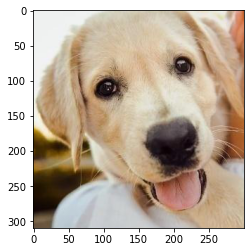

In [4]:
# 讀取影像
img = mpimg.imread('img.jpeg')

# 提取影像 左上角(220, 140)至右下角(520, 450)
img = img[140:450,220:520,:]
print("matplotlib:", type(img))

# 儲存影像
plt.imsave('homework_3.jpeg',img)

# 顯示影像
plt.imshow(img)
plt.show()

## Homework 04
* 以OpenCV讀取影像，不能使用 cv2.cvtColor() 而是以陣列取代方式來實現BGR轉RGB通道，並用Matplotlib顯示
    * 【提示】
        * 1. 將各通道的像素提取出來，存至變數B, G, R
        * 2. 再使用numpy.empty建立大小為(H, W, 3)的空陣列[[連結]](https://numpy.org/doc/stable/reference/generated/numpy.empty.html)
        * 3. 將陣列型別使用numpy.ndarray.astype轉為整數[[連結]](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html)
        * 4. 分別按照R、G、B各塞入

(562, 833, 3)


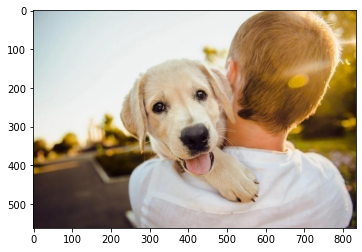

In [35]:
# 讀取影像
img = cv2.imread("img.jpeg")

print(img.shape)

# 方法一、反轉陣列最後一個維度
#img = img[:,:,::-1] # 

# 方法二、反轉陣列最後一個維度
#img = img[:, :, [2,1,0]] 

# 方法三、各通道提取出來後，陣列串接
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

new_img = np.empty(img.shape)
new_img = new_img.astype(np.uint8)
new_img[:,:,0] = R
new_img[:,:,1] = G
new_img[:,:,2] = B

# 顯示影像
plt.imshow(new_img)
plt.show()

## Homework 05
* 讀取影像並調整影像亮度提高20%與降低20%，並用Matplotlib顯示
    * 【提示】
        * 1.先將BGR轉為浮點數形式，並將數值進行正規化都投射於0到1之間，即除以255
        * 2.cv2.cvtColor將BGR轉為HLS
        * 3.在L通道中，根據公式 (1+亮度%)*L 提高亮度像素值
        * 4.由於亮度被提高後數值可能會超過1，所以將亮度通道的值超過1的，取代為1
        * 5.還原正規化前的數值，即乘以255，並將浮點數形式轉為整數
        * 6.打印影像

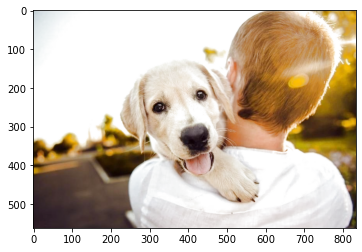

In [20]:
import numpy as np

lightness = 20

image = cv2.imread("img.jpeg").astype(np.float32)
fImg = image / 255.0
hlsCopy = cv2.cvtColor(fImg, cv2.COLOR_BGR2HLS)
hlsCopy[:, :, 1] = (1 + lightness / 100.0) * hlsCopy[:, :, 1]
hlsCopy[:, :, 1][hlsCopy[:, :, 1] > 1] = 1
result_img = cv2.cvtColor(hlsCopy, cv2.COLOR_HLS2RGB)
result_img = ((result_img * 255).astype(np.uint8))

# 顯示影像
plt.imshow(result_img)
plt.show()

## Homework 06
* 開啟攝影機：
    * 在畫面中繪製紅色正方形(填滿)在畫面左上角位置(100, 100) 到 右下角位置(200, 200)
        * 【提示】只要把該正方形位置的像素全部改為BGR(0, 0, 255)
    * 將純紅色正方形改為透明度60%的紅色 
        * 【提示】只要把該正方形位置的像素之紅色通道，更改為R*alpha + 255 * (1 - alpha)，其中alpha為透明值0.6

In [ ]:
alpha = 0.6

cap = cv2.VideoCapture(0)
while True:
    hasFrame, img = cap.read()
    
    # 01
    # img[100:200,100:200,:] = [0,0,255]
    
    # 02
    img[100:200,100:200, 2] = img[100:200,100:200, 2] * alpha + 255 * (1 - alpha)
    
    cv2.imshow("Frame", img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()